In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import os

In [2]:
path = r'T:\Data\CENSUS\TIGER'

In [3]:
bg21 = gpd.read_file(os.path.join(path, 'tl_2021_41_bg', 'tl_2021_41_bg.shp'))

In [4]:
bg21 = bg21[bg21.COUNTYFP == '039']

In [5]:
bg21 = bg21.to_crs(epsg=3857)

In [6]:
bg21["area_bg"] = bg21['geometry'].area/ 10**6

In [7]:
MPObd = gpd.read_file("X:/Data/Transportation/MPO_Bound.shp")

In [8]:
bg21_cl = gpd.clip(bg21, MPObd)

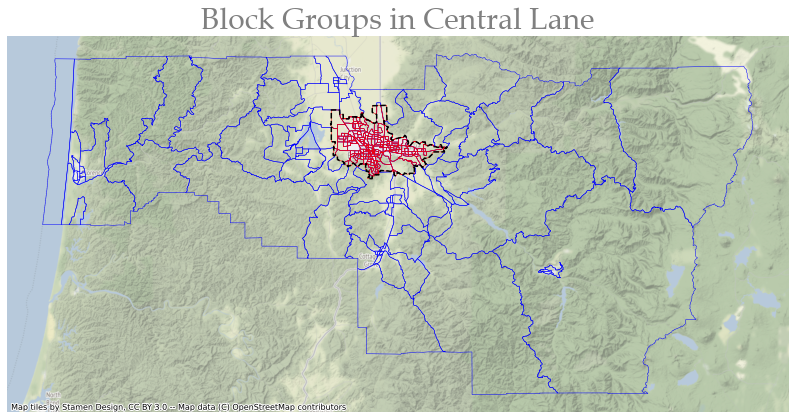

In [9]:
fig, ax = plt.subplots(figsize=(14, 12))
bg21.plot(ax=ax, facecolor="none", edgecolor="blue", linewidth = 0.5, aspect=1)
bg21_cl.plot(ax=ax, facecolor="none", edgecolor="red", linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Block Groups in Central Lane", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [11]:
bg21_cl["area"] = bg21_cl['geometry'].area/ 10**6

In [12]:
bg21_cl.head(3)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area_bg,area
1277,41,039,001700,2,410390017002,Block Group 2,G5030,S,20487476,54219,+43.9735502,-122.9982293,"POLYGON ((-13693593.775 5463648.142, -13693608...",39.664190,2.145142
518,41,039,001101,1,410390011011,Block Group 1,G5030,S,91260241,0,+43.9548247,-123.0744401,"MULTIPOLYGON (((-13707911.114 5466859.654, -13...",176.141181,3.567428
444,41,039,005000,3,410390050003,Block Group 3,G5030,S,1733554,0,+43.9972023,-123.0788184,"POLYGON ((-13702191.748 5464617.841, -13702182...",3.350683,3.350683


In [13]:
bg21_cl["PctInside"] = bg21_cl["area"] / bg21_cl["area_bg"] 

In [15]:
df = bg21_cl[["GEOID", "PctInside"]]

In [16]:
df.to_csv(os.path.join(path, 'blockgroup_in_mpo.csv'), index=False)

In [17]:
bg21_cl.to_file(os.path.join(path, 'blockgroup2021.shp'))